# Versuch 2 - Code

1. Aufgabe - Aufnahme und Analyse eines Grauwertkeiles

*Belichtungsparameter:*
Belichtung: -6
Helligkeit: 150
Kontrast: 32
Sättigung: 27
Schärfe: 119
Weißabgleich: 7400
Hintergrund: 1
Verstärkung: 10
Leistungsfrequenz: 60 Hz 

In [32]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import cv2

image = cv2.imread("aufgabe1.2.png") #Bild einlesen 
image = image.astype('float32') #in float umwandeln 

height, width = image.shape[:2]

schwarz = image[0:height, 0:131]
dunkelgrau = image[0:height, 131:270]
mittelgrau = image[0:height, 270:410]
hellgrau = image[0:height, 410:550]
weiß = image[0:height, 550:640]


cv2.imwrite("ergebnis_aufgabe1/black.png", schwarz.astype('uint8'))
cv2.imwrite("ergebnis_aufgabe1/dark1.png", dunkelgrau.astype('uint8'))
cv2.imwrite("ergebnis_aufgabe1/dark2.png", mittelgrau.astype('uint8'))
cv2.imwrite("ergebnis_aufgabe1/dark3.png", hellgrau.astype('uint8'))
cv2.imwrite("ergebnis_aufgabe1/white.png", weiß.astype('uint8'))



# Berechnen von Standardabweichung und Mittelwert für jeden Zuschnitt
results = {
    "schwarz": {"std": np.std(schwarz), "mean": np.mean(schwarz)},
    "dunkelgrau": {"std": np.std(dunkelgrau), "mean": np.mean(dunkelgrau)},
    "mittelgrau": {"std": np.std(mittelgrau), "mean": np.mean(mittelgrau)},
    "hellgrau": {"std": np.std(hellgrau), "mean": np.mean(hellgrau)},
    "weiß": {"std": np.std(weiß), "mean": np.mean(weiß)}
}

# Ausgabe der Ergebnisse
print("Bereich      | Standardabweichung | Mittelwert")
print("----------------------------------------------")
for label, values in results.items():
    print("{:<12} | {} | {}".format(label, round(values["std"], 6), round(values["mean"], 6)))



Bereich      | Standardabweichung | Mittelwert
----------------------------------------------
schwarz      | 2.8370320796966553 | 29.443511962890625
dunkelgrau   | 4.959405899047852 | 67.36009979248047
mittelgrau   | 5.281680107116699 | 112.04337310791016
hellgrau     | 5.793315887451172 | 150.98565673828125
weiß         | 3.7496418952941895 | 195.5585479736328


2. Aufgabe - Aufnahme eines Dunkelbildes

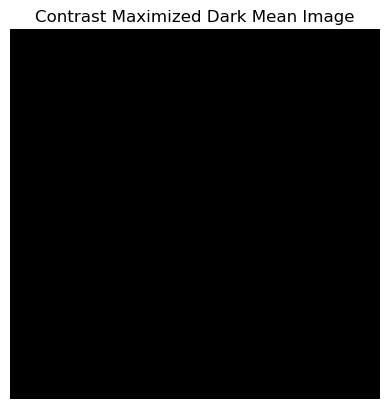

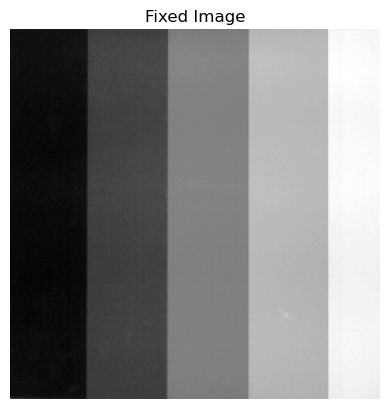

In [35]:
image = "aufgabe2_"
image2 = "aufgabe1.png"
imagearray = []


def darkmean(path):
    for i in range(10):
        img = cv2.imread(f"{path}{i}.png", cv2.IMREAD_GRAYSCALE)
        if img is not None and img.shape[0] > 0 and img.shape[1] > 0:  # Überprüfung auf gültige Größe
            # Skalierung auf gleiche Größe (z.B. 300x300)
            img = cv2.resize(img, (700, 700))
            imagearray.append(img)

    return np.mean(imagearray, axis=0).astype(np.double) #in double umwandeln 

darkmean = darkmean(image)
cv2.imwrite("ergebnis_aufgabe2/darkmean.png", darkmean.astype('uint8'))

def subdarkmean(img):
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE) #einlesen
    img_gray_resized = cv2.resize(img, (700, 700)) #
    return img_gray_resized - darkmean

new_img = subdarkmean(image2)
cv2.imwrite("ergebnis_aufgabe2/fixedimage.png", new_img.astype('uint8'))

# Funktion zur Kontrastmaximierung aufrufen und kontrastmaximiertes Bild anzeigen
def display_contrast_maximized_dark_image(dark_image):
    # Anwenden der Histogrammnormalisierung
    normalized_image = cv2.normalize(dark_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    # Anzeigen des kontrastmaximierten Dunkelbilds
    plt.imshow(normalized_image, cmap='gray')
    plt.title('Contrast Maximized Dark Mean Image')
    plt.axis('off')
    plt.show()

display_contrast_maximized_dark_image(darkmean)

# Laden und Anzeigen des fixedimage-Bildes
fixed_img = cv2.imread("ergebnis_aufgabe2/fixedimage.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(fixed_img, cmap='gray')
plt.title('Fixed Image')
plt.axis('off')  # Deaktivieren der Achsenbeschriftungen
plt.show()

3. Aufgabe - Aufnahme eines Weißbildes 

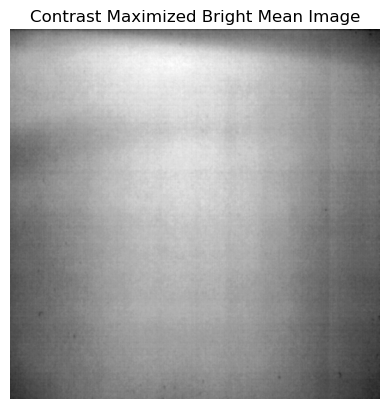

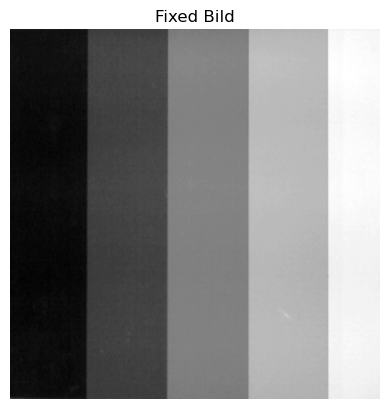

In [37]:
image = "aufgabe3_"
image2 = "aufgabe1.png"
imagearray = []


def brightmean(path):
    for i in range(10):
        img = cv2.imread(f"{path}{i}.png", cv2.IMREAD_GRAYSCALE)
        if img is not None and img.shape[0] > 0 and img.shape[1] > 0:  # Überprüfung auf gültige Größe
            # Skalierung auf gleiche Größe (z.B. 300x300)
            img = cv2.resize(img, (700, 700))
            imagearray.append(img)

    return np.mean(imagearray, axis=0).astype(np.double) #in double umwandeln 

cv2.imwrite("ergebnis_aufgabe3/brightmean.png", brightmean(image).astype('uint8'))

def subbrightmean(img):
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE) #einlesen
    img_resized = cv2.resize(img, (700, 700)) 
    return img_resized - brightmean(image)

cv2.imwrite("ergebnis_aufgabe3/fixedimage.png", subbrightmean(image2).astype('uint8'))

# Funktion zur Kontrastmaximierung aufrufen und kontrastmaximiertes Bild anzeigen
def display_contrast_maximized_bright_image(bright_image):
    # Anwenden der Histogrammnormalisierung
    normalized_bright_image = cv2.normalize(bright_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    # Anzeigen des kontrastmaximierten Dunkelbilds
    plt.imshow(normalized_bright_image, cmap='gray')
    plt.title('Contrast Maximized Bright Mean Image')
    plt.axis('off')
    plt.show()

display_contrast_maximized_bright_image(brightmean(image))

# Laden und Anzeigen des fixedimage-Bildes
fixed_img = cv2.imread("ergebnis_aufgabe2/fixedimage.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(fixed_img, cmap='gray')
plt.title('Fixed Image')
plt.axis('off')  # Deaktivieren der Achsenbeschriftungen
plt.show()